In [1]:
################
################   Clean Data + Generate Model + Evaluate
################   BNP Paribas Cardif Claims Management Kaggle Competition
################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import grid_search
from scipy import stats

# import other methods
from clean import *

%matplotlib inline

##### upload data
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")
test = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/test.csv")
sample = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/sample_submission.csv")
trains = train[:100]
tests = test[:100]


##### split data  
tr_a, te_a = train_test_split(train, train_size = 0.8)

## define variables 
y_train = tr_a.target
y_test = te_a.target
columns = train.columns
x_train = tr_a[columns[2:]]
x_test = te_a[columns[2:]]

In [7]:
## define parameters
param_grid_1 =  {'randomforestclassifier__max_depth': [8,16],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[20,100], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[10], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_2 =  {'randomforestclassifier__max_depth': [16,300],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[5,10], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[10], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_3 =  {'randomforestclassifier__max_depth': [16,75],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[2,5], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[10], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_4 =  {'randomforestclassifier__max_depth': [8,16],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[10], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1,5], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_5 =  {'randomforestclassifier__max_depth': [16,25],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[10,50], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}

In [ ]:
##### generate pipeline 
## X.shape (91456, 108)
call = PipelineBNP(RandomForestClassifier)
gs = grid_search.GridSearchCV(call, param_grid_5, cv=2, scoring='roc_auc', n_jobs=2, pre_dispatch='n_jobs')
gs = gs.fit(x_train,y_train)

pipeline done.


/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


NullToNaNTrans fit done.
NullToNaNTrans transform done.


/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


DataSpliterTrans fit done.
NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45727, 108)
ObjtoCatStrtoIntTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.
NullToNaNTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.
NullToNaNTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
DataSpliterTrans transform don

/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
ObjtoCatStrtoIntTrans transform done.


/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45727, 108)
ObjtoCatStrtoIntTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.
NullToNaNTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.


/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
NullToNaNTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
ObjtoCatStrtoIntTrans transform done.


/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45727, 108)
ObjtoCatStrtoIntTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.
NullToNaNTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.


/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
NullToNaNTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
DataSpliterTrans transform done.
(45727, 108)
ObjtoCatStrtoIntTrans transform done.


/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)
/home/celsa/.local/lib/python3.4/site-packages/sklearn/utils/__init__.py:157: DataConversionWarning: Copying input dataframe for slicing.
  DataConversionWarning)


NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
DataSpliterTrans fit done.
(45727, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45727, 108)
ObjtoCatStrtoIntTrans transform done.
DataSpliterTrans fit done.
(45729, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.
NullToNaNTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
DataSpliterTrans transform done.
(45729, 108)
ObjtoCatStrtoIntTrans transform done.
DataSpliterTrans fit done.
(91456, 108)
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(91456, 108)
ObjtoCatStrtoIntTrans transform done.


In [9]:
##### plot the roc_auc to compare parameters
sco = gs.grid_scores_
sco

[mean: 0.59965, std: 0.06192, params: {'randomforestclassifier__max_depth': 16, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_jobs': 1, 'randomforestclassifier__n_estimators': 10, 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__min_weight_fraction_leaf': 0.0, 'randomforestclassifier__min_samples_leaf': 1},
 mean: 0.60224, std: 0.02562, params: {'randomforestclassifier__max_depth': 16, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_jobs': 1, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__min_weight_fraction_leaf': 0.0, 'randomforestclassifier__min_samples_leaf': 1},
 mean: 0.56259, std: 0.01290, params: {'randomforestclassifier__max_depth': 25, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__criterion': 'gini', 'randomforest

In [10]:
# extract data from scoring function
meanv = np.zeros(len(sco))
deptv = np.zeros(len(sco),dtype=np.int)
estiv = np.zeros(len(sco),dtype=np.int)
deptk = [i for i in sco[0].parameters.keys()][0]
estik = [i for i in sco[0].parameters.keys()][4]

l = 0
while l < len(sco):
    mean = sco[l].mean_validation_score
    par = sco[l].parameters.values()
    values = [v for v in par]
    meanv[l] = mean
    estiv[l] = values[4]
    deptv[l] = values[0]
    l += 1
print(deptk,estik)

randomforestclassifier__max_depth randomforestclassifier__n_estimators


[[ 0.59965432  0.60224266]
 [ 0.56259135  0.61775878]]


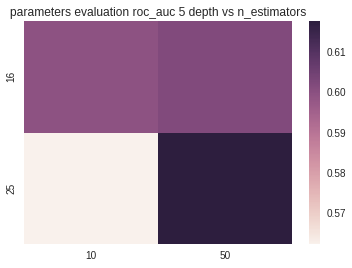

In [11]:
# plot scoring function data
ma = np.matrix([[meanv[0], meanv[1]], [meanv[2], meanv[3]]], dtype=np.float64)
scores = pd.DataFrame(ma,columns=np.unique(estiv),index=np.unique(deptv))
ax = sns.heatmap(scores)
ax.set_title('parameters evaluation roc_auc 5 depth vs n_estimators')
ax.set_title
fig = ax.get_figure()
fig.savefig("par_eval_5_depth8_10_esti20_100.png")
print(ma)

In [ ]:
##### generate y_predict
y_predict = gs.predict_proba(x_test)

In [ ]:
##### check parameters
#call.get_params()

In [ ]:
##### Compute ROC curve and ROC area for each fold
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test1,y_predict1_1)
a1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2,y_predict2_1)
a2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test3,y_predict3_1)
a3 = metrics.auc(fpr3, tpr3)

In [ ]:
ax = sns.set_style("whitegrid")
ax = sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 1.5})

In [ ]:
plt.plot(fpr1, tpr1, label='ROC curve 1 (area = %0.2f)' % a1)
plt.plot(fpr2, tpr2, label='ROC curve 2 (area = %0.2f)' % a2)
plt.plot(fpr3, tpr3, label='ROC curve 3 (area = %0.2f)' % a3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 3-fold CV before Grid Search')
plt.legend(loc="lower right")
plt.show()
plt.savefig("ROC_Curve_wGS")